In [2]:
#Set dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import os
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.dates as md
from scipy import stats

In [3]:
#import csv files from the data folder

csv_path = os.path.join("..", "data", "Harvey_v2_2017_20200918_2122.csv")
csv_path_test = os.path.join("..", "data", "wnd_spd_vs_wtr_temp_20200920_0928.csv")
csv_path_TABS_X_1 = os.path.join("..", "data", "TABS_X_1_202009_1203.csv")
csv_path_Havery_sonar = os.path.join("..", "data", "storm_path_data_20200920_2336.csv")

metadata_df = pd.read_csv(csv_path)
print(type(metadata_df))
metadata_df

wnd_spd_vs_wtr_temp_df = pd.read_csv(csv_path_test)
print(type(wnd_spd_vs_wtr_temp_df))
wnd_spd_vs_wtr_temp_df

TABS_X_1_df = pd.read_csv(csv_path_TABS_X_1)
print(type(TABS_X_1_df))
TABS_X_1_df

Havery_sonar_df = pd.read_csv(csv_path_Havery_sonar)
print(type(csv_path_Havery_sonar))
Havery_sonar_df

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>


,Date,Time,Lat,Lon,Wind (mph),Wind (m/s),Pressure (mb),Storm Type
0,8/16/17,6:00:00 AM,13.700,-45.800,29,12.963791,1013,Tropical Low
1,8/16/17,9:00:00 AM,13.713,-46.600,29,12.963791,1011,Tropical Low
2,8/16/17,12:00:00 PM,13.700,-47.400,29,12.963791,1010,Tropical Low
3,8/16/17,3:00:00 PM,13.650,-48.200,29,12.963791,1009,Tropical Low
4,8/16/17,6:00:00 PM,13.600,-49.000,29,12.963791,1009,Tropical Low
...,...,...,...,...,...,...,...,...
136,9/2/17,12:00:00 AM,37.200,-85.600,23,10.281627,1007,Extratropical
137,9/2/17,3:00:00 AM,37.580,-85.205,23,10.281627,1008,Extratropical
138,9/2/17,6:00:00 AM,37.900,-84.900,23,10.281627,1009,Extratropical
139,9/2/17,9:00:00 AM,38.090,-84.752,20,8.940545,1011,Extratropical


In [4]:
metadata_df["date"]  = pd.to_datetime(metadata_df.date)
TABS_X_1_df['date']= pd.to_datetime(TABS_X_1_df.date)
Havery_sonar_df['Date']= pd.to_datetime(Havery_sonar_df.Date)
Havery_sonar_df.dtypes

Date             datetime64[ns]
Time                     object
Lat                     float64
Lon                     float64
Wind (mph)                int64
Wind (m/s)              float64
Pressure (mb)             int64
Storm Type               object
dtype: object

In [136]:
Havery_sonar_df

,Date,Time,Lat,Lon,Wind (mph),Wind (m/s),Pressure (mb),Storm Type
0,2017-08-16,6:00:00 AM,13.700,-45.800,29,12.963791,1013,Tropical Low
1,2017-08-16,9:00:00 AM,13.713,-46.600,29,12.963791,1011,Tropical Low
2,2017-08-16,12:00:00 PM,13.700,-47.400,29,12.963791,1010,Tropical Low
3,2017-08-16,3:00:00 PM,13.650,-48.200,29,12.963791,1009,Tropical Low
4,2017-08-16,6:00:00 PM,13.600,-49.000,29,12.963791,1009,Tropical Low
...,...,...,...,...,...,...,...,...
136,2017-09-02,12:00:00 AM,37.200,-85.600,23,10.281627,1007,Extratropical
137,2017-09-02,3:00:00 AM,37.580,-85.205,23,10.281627,1008,Extratropical
138,2017-09-02,6:00:00 AM,37.900,-84.900,23,10.281627,1009,Extratropical
139,2017-09-02,9:00:00 AM,38.090,-84.752,20,8.940545,1011,Extratropical


In [32]:
metadata_df_drpna = metadata_df.dropna()
TABS_X_1_df_drpna = TABS_X_1_df.dropna()

In [33]:
len(metadata_df_drpna)

20551

In [34]:
# type(TABS_X_1_df)
TABS_X_1_df["date"].value_counts()

2017-08-28 02:00:00+00:00    1
2017-08-22 10:00:00+00:00    1
2017-08-25 04:00:00+00:00    1
2017-08-19 18:30:00+00:00    1
2017-08-29 15:30:00+00:00    1
                            ..
2017-08-16 18:00:00+00:00    1
2017-08-21 23:30:00+00:00    1
2017-08-26 15:00:00+00:00    1
2017-08-15 20:00:00+00:00    1
2017-08-18 05:00:00+00:00    1
Name: date, Length: 766, dtype: int64

In [36]:
type(date_filter)
date_filter

11624    False
11625    False
11626    False
11627    False
11628    False
         ...  
16451    False
16452    False
16453    False
16454    False
16455    False
Name: date, Length: 4832, dtype: bool

In [38]:
test_2 = metadata_df.loc[metadata_df["sensor"] == "wmo_42019_1"]
test_2

,Unnamed: 0,date,sensor,latitude,longitude,air_pressure(mBar),air_temperature,sea_water_practical_salinity,sea_water_temperature,wind_speed
0,0,2017-06-01 00:50:00+00:00,wmo_42019_1,27.907,-95.353,1013.9,24.4,0.0,27.0,6.0
1,1,2017-06-01 01:50:00+00:00,wmo_42019_1,27.907,-95.353,1013.4,25.1,0.0,27.0,2.0
2,2,2017-06-01 02:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.5,25.5,0.0,27.0,2.0
3,3,2017-06-01 03:50:00+00:00,wmo_42019_1,27.907,-95.353,1015.6,25.6,0.0,27.0,3.0
4,4,2017-06-01 04:50:00+00:00,wmo_42019_1,27.907,-95.353,1015.3,25.6,0.0,27.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2396,2396,2017-09-30 18:50:00+00:00,wmo_42019_1,27.907,-95.353,1015.5,28.0,0.0,28.9,6.0
2397,2397,2017-09-30 19:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.7,28.0,0.0,29.0,5.0
2398,2398,2017-09-30 20:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.3,28.0,0.0,29.0,6.0
2399,2399,2017-09-30 21:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.1,27.9,0.0,29.0,5.0


In [39]:
test = metadata_df_drpna.loc[metadata_df_drpna["sensor"] == "wmo_42019_1"]
test

,Unnamed: 0,date,sensor,latitude,longitude,air_pressure(mBar),air_temperature,sea_water_practical_salinity,sea_water_temperature,wind_speed
0,0,2017-06-01 00:50:00+00:00,wmo_42019_1,27.907,-95.353,1013.9,24.4,0.0,27.0,6.0
1,1,2017-06-01 01:50:00+00:00,wmo_42019_1,27.907,-95.353,1013.4,25.1,0.0,27.0,2.0
2,2,2017-06-01 02:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.5,25.5,0.0,27.0,2.0
3,3,2017-06-01 03:50:00+00:00,wmo_42019_1,27.907,-95.353,1015.6,25.6,0.0,27.0,3.0
4,4,2017-06-01 04:50:00+00:00,wmo_42019_1,27.907,-95.353,1015.3,25.6,0.0,27.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2396,2396,2017-09-30 18:50:00+00:00,wmo_42019_1,27.907,-95.353,1015.5,28.0,0.0,28.9,6.0
2397,2397,2017-09-30 19:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.7,28.0,0.0,29.0,5.0
2398,2398,2017-09-30 20:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.3,28.0,0.0,29.0,6.0
2399,2399,2017-09-30 21:50:00+00:00,wmo_42019_1,27.907,-95.353,1014.1,27.9,0.0,29.0,5.0


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot in

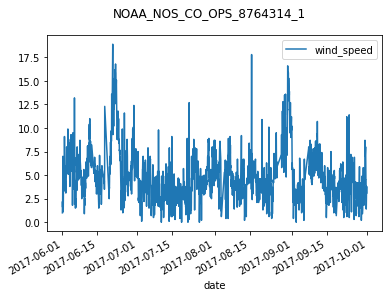

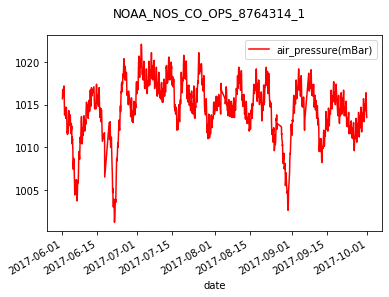

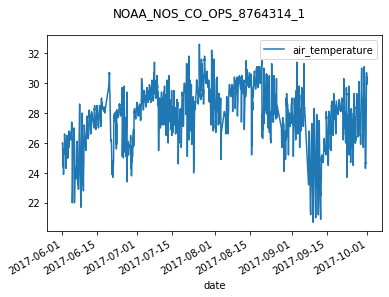

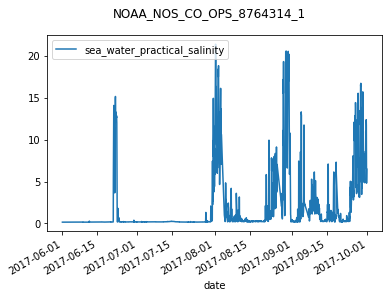

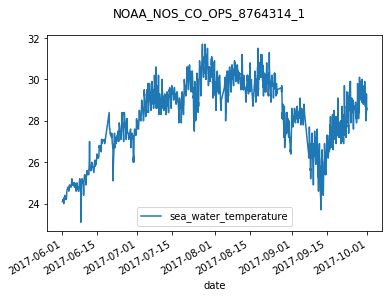

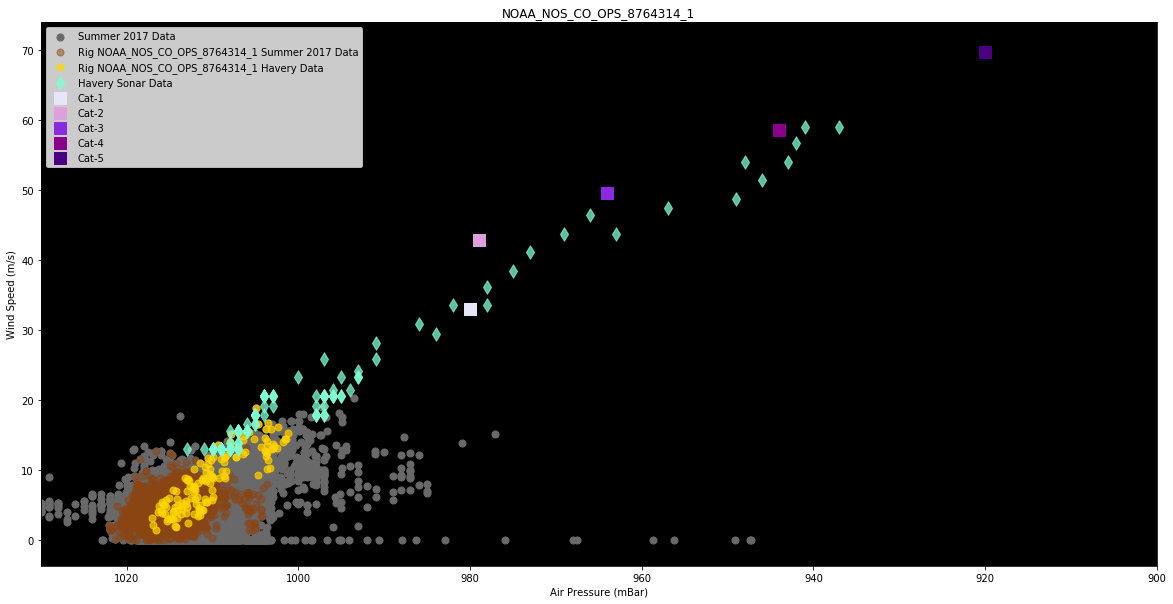

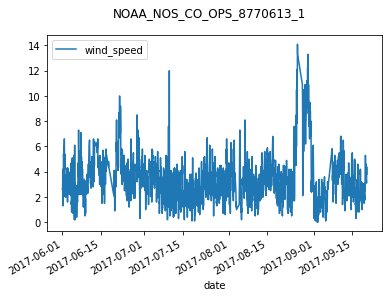

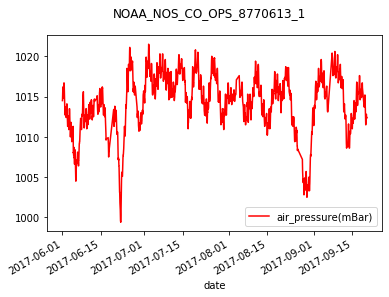

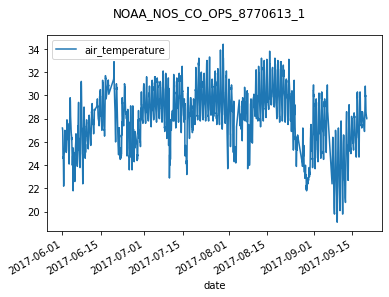

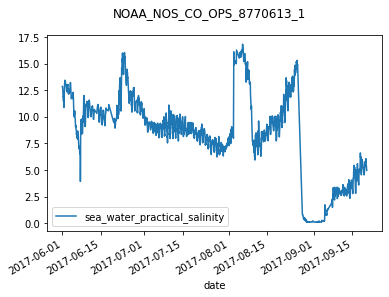

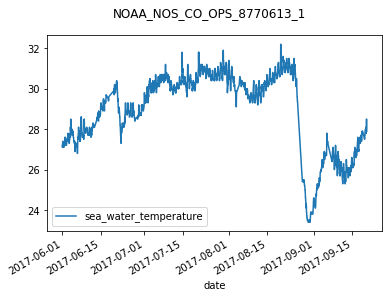

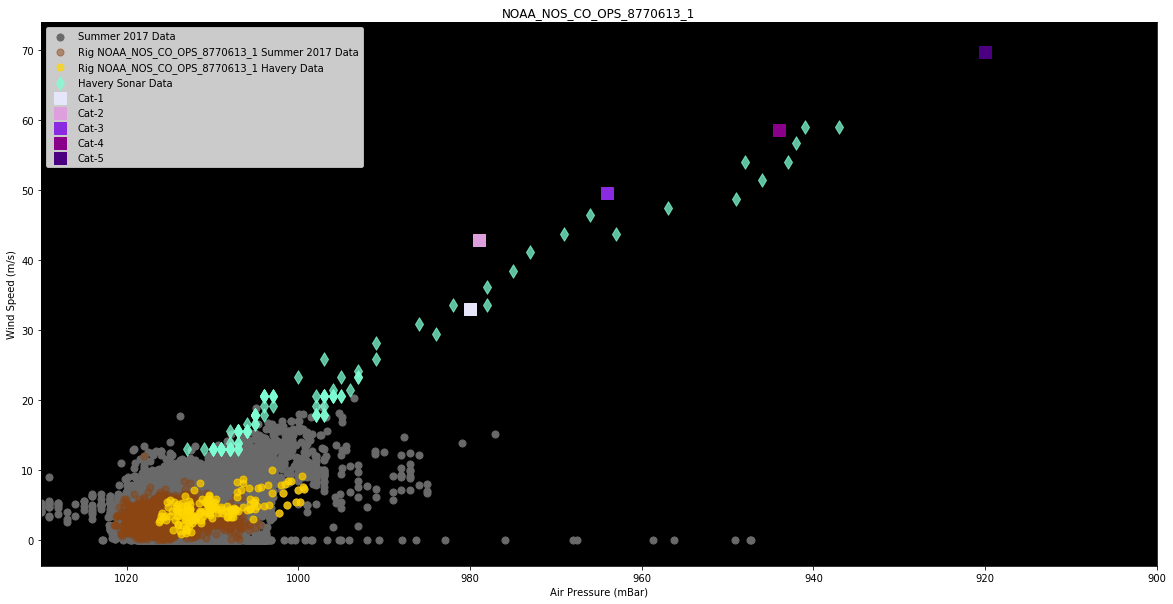

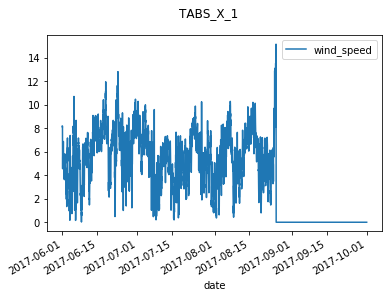

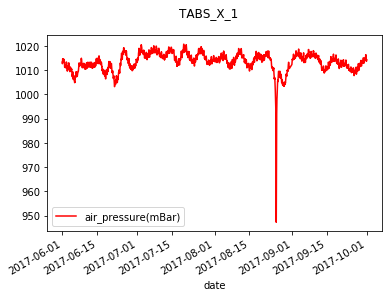

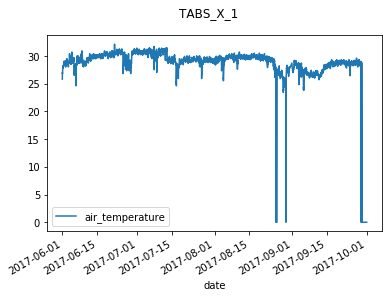

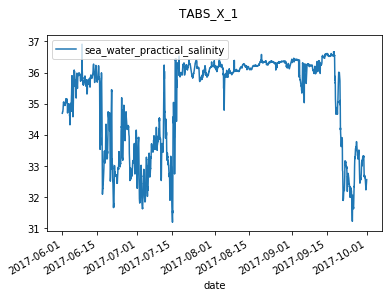

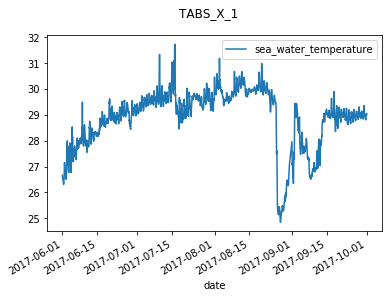

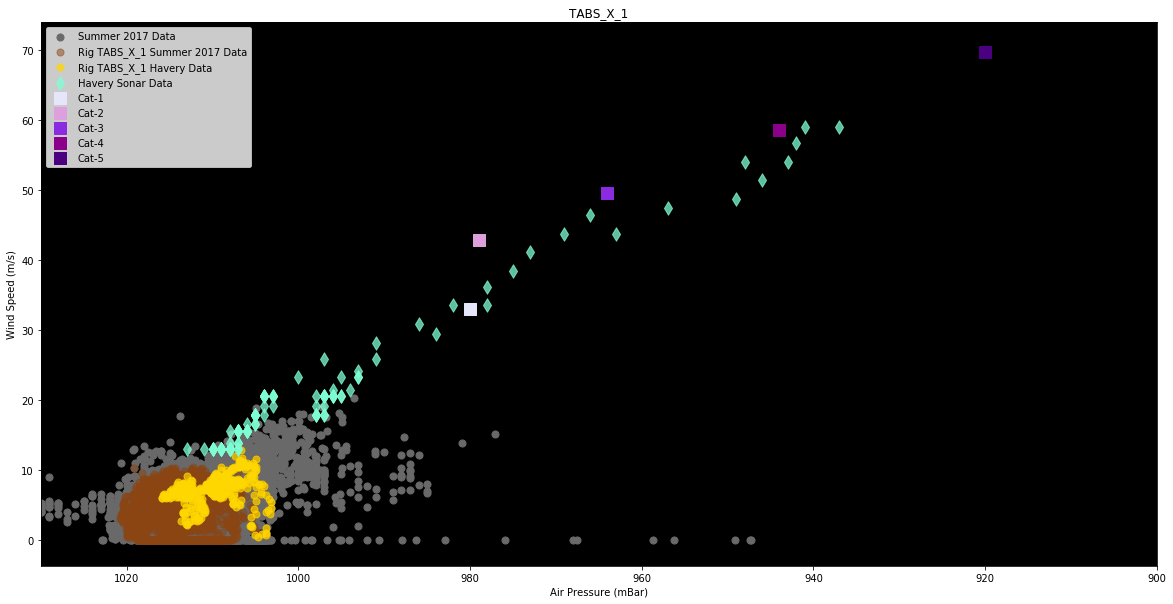

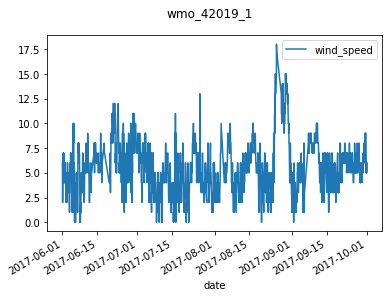

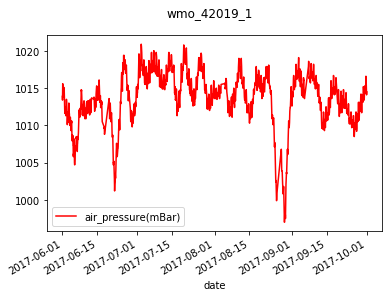

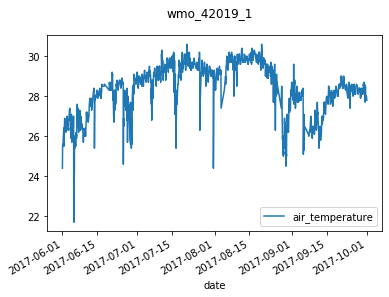

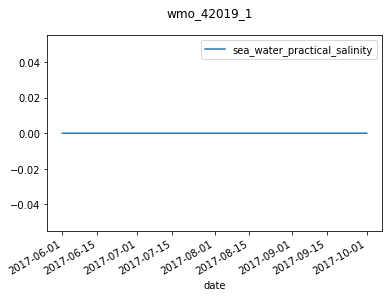

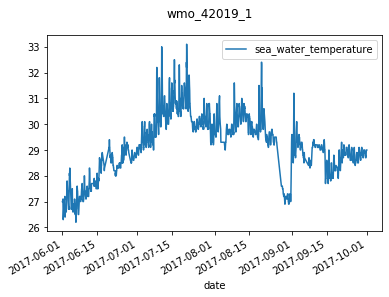

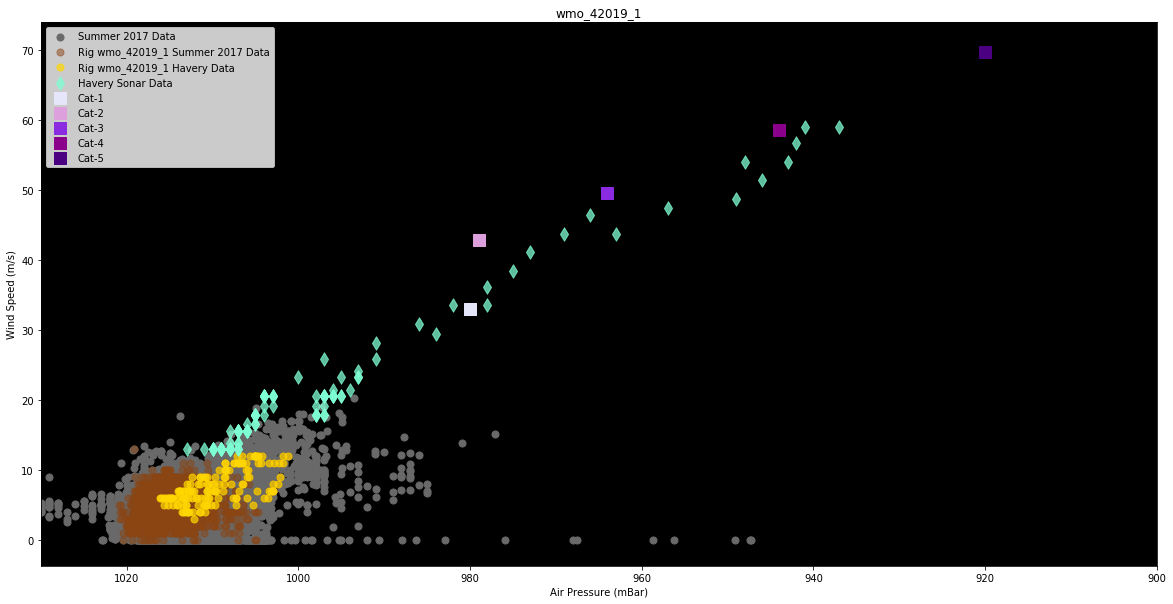

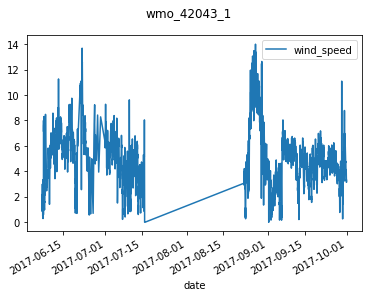

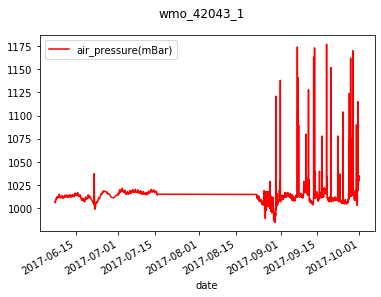

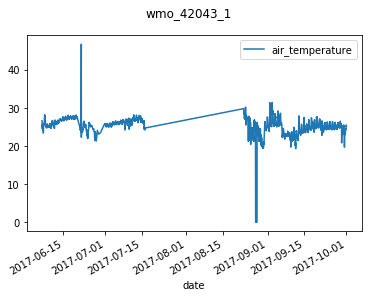

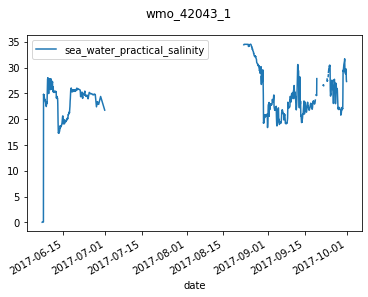

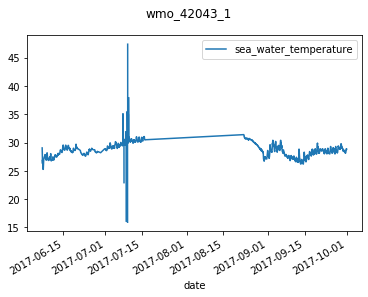

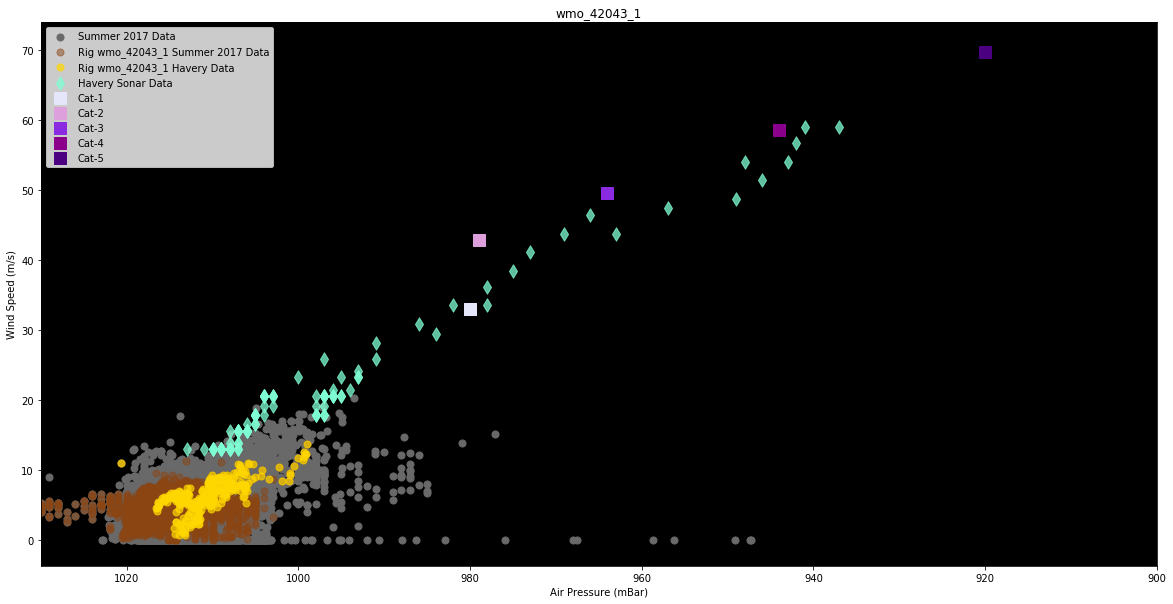

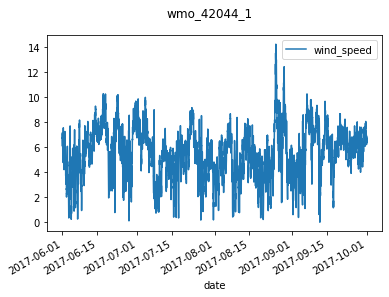

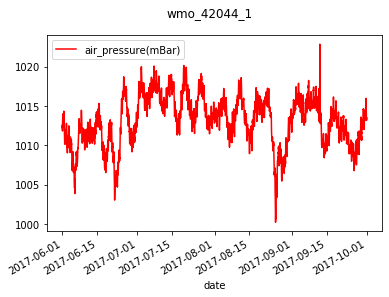

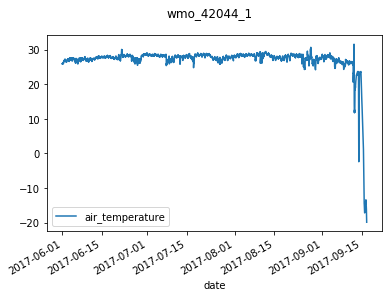

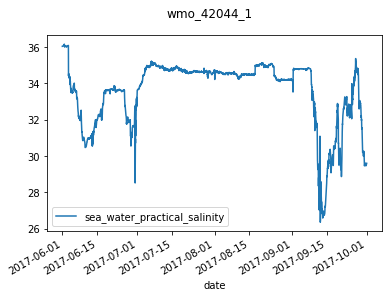

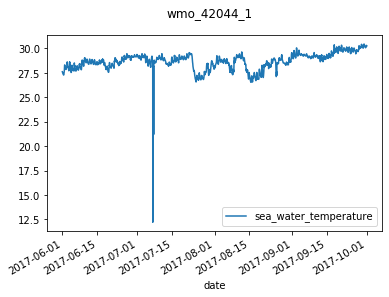

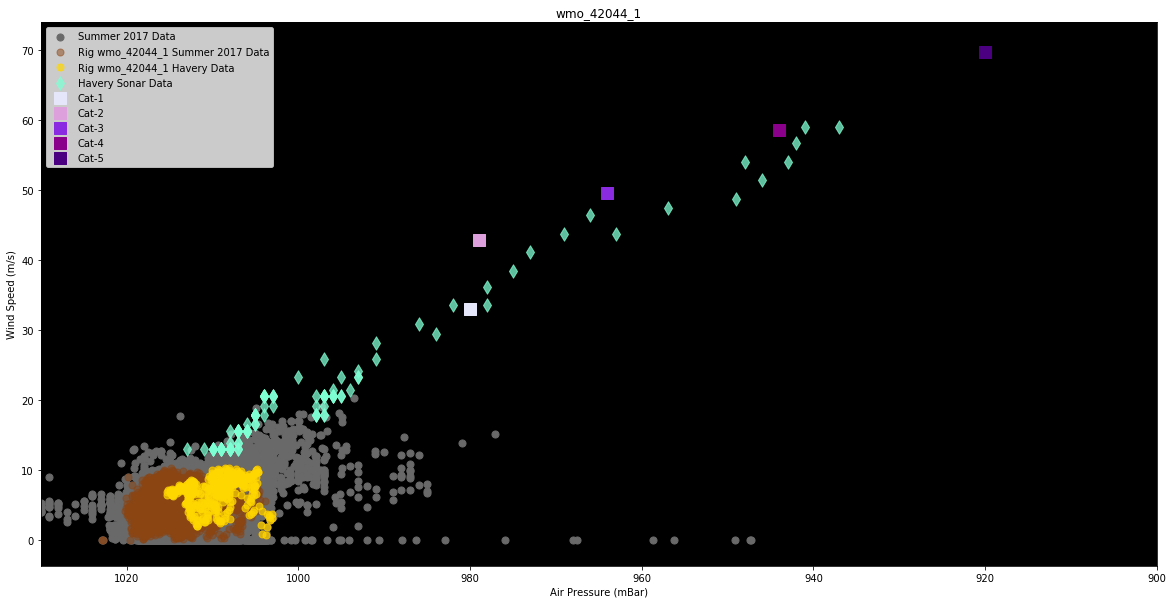

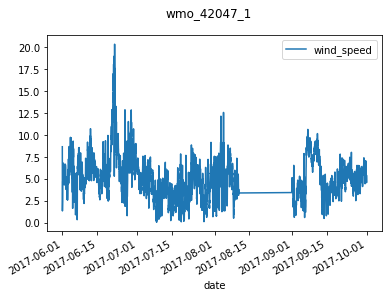

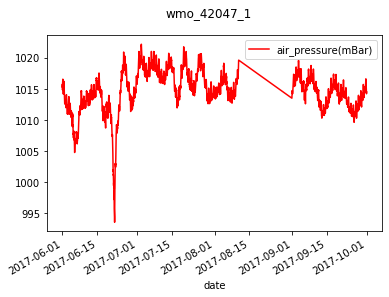

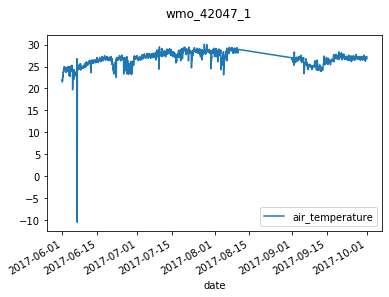

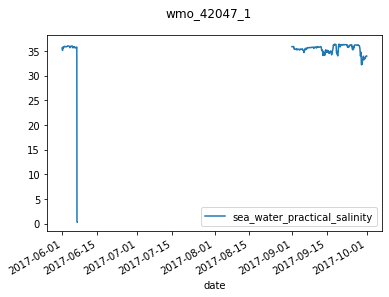

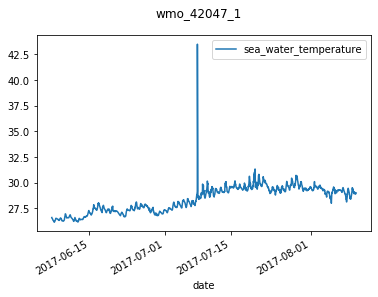

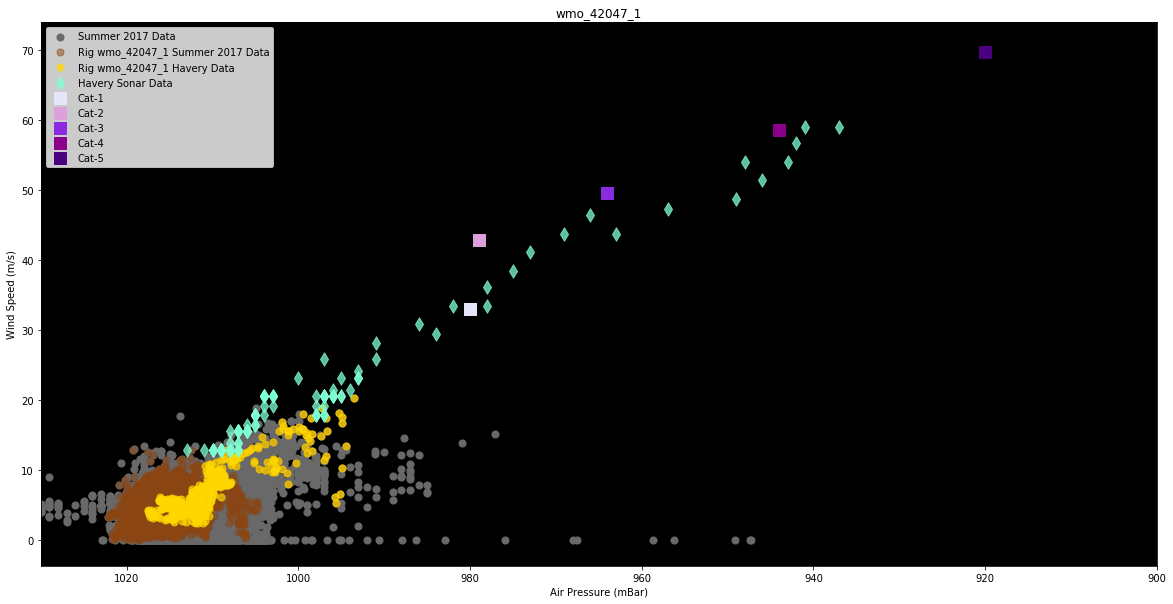

In [65]:
x=0
for title, group in metadata_df.groupby(["sensor"]):
    group.plot(x='date', y='wind_speed', subplots=True, title=title)
    fig = plt.gcf()
    fig.savefig(f"../images/{title}_wind_speed.png")
    
    group.plot(x='date', y='air_pressure(mBar)', subplots=True, title=title, color = "red")
    fig = plt.gcf()
    fig.savefig(f"../images/{title}_air_pressure.png")
    
    group.plot(x='date', y='air_temperature', subplots=True, title=title)
    fig = plt.gcf()
    fig.savefig(f"../images/{title}_air_temp.png")
    
    group.plot(x='date', y='sea_water_practical_salinity', subplots=True, title=title)
    fig = plt.gcf()
    fig.savefig(f"../images/{title}_salinity.png")
    
    group.plot(x='date', y='sea_water_temperature', subplots=True, title=title)
    fig = plt.gcf()
    fig.savefig(f"../images/{title}_water_temp.png")
    

    plt.figure(figsize=(20,10))

    
    date_filter = (group['date']>'2017-06-15') & (group['date']<'2017-06-24')

    date_filter_not = (group['date']<'2017-08-15') | (group['date']>'2017-09-01')
    
#     date_filter_not_metadata = (metadata_df['date']<'2017-08-15') | (metadata_df['date']>'2017-09-01')
    
    date_filter_Havery_sonar_df = (Havery_sonar_df['Date']>'2017-08-15') & (Havery_sonar_df['Date']<'2017-08-30')

    
    plt.scatter(metadata_df['air_pressure(mBar)'],
                metadata_df["wind_speed"],
                s = 50,
                c='dimgray',
                alpha=1,
                label = "Summer 2017 Data")

    plt.scatter(x = group[date_filter_not]['air_pressure(mBar)'],
                y = group[date_filter_not]["wind_speed"],
#                 title = title,
                s = 50,
                c = 'saddlebrown',
                alpha=0.5,
                label = f"Rig {title} Summer 2017 Data")
    
    plt.scatter(x = group[date_filter]['air_pressure(mBar)'],
                y = group[date_filter]["wind_speed"],
#                 title = title,
                s = 50,
                c = 'gold',
                alpha=0.7,
                label = f"Rig {title} Havery Data")
    
    plt.scatter(x = Havery_sonar_df[date_filter_Havery_sonar_df]['Pressure (mb)'],
                y = Havery_sonar_df[date_filter_Havery_sonar_df]["Wind (m/s)"],
#                 title = title,
                marker = "d",
                s = 90,
                c = 'aquamarine',
                alpha=0.75,
                label = "Havery Sonar Data")


# Category 1 Storm
    plt.scatter(980, 33.081,
                marker = "s",
                s = 150,
                color = "lavender",
                label = "Cat-1") 

# Category 2 Storm    
    plt.scatter(979, 42.9158, 
                marker = "s",
                s = 150,
                color = "plum",
                label = "Cat-2") 
    
# Category 3 Storm   
    plt.scatter(964, 49.6214,
                marker = "s",
                s = 150,
                color = "blueviolet",
                label = "Cat-3") 

# Category 4 Storm
    plt.scatter(944, 58.5622,
                marker = "s",
                s = 150,
                color = "darkmagenta",
                label = "Cat-4") 

# Category 5 Storm
    plt.scatter(920, 69.7382,
                marker = "s",
                s = 150,
                color = "indigo",
                label = "Cat-5") 

    
    plt.xlabel("Air Pressure (mBar)")
    plt.ylabel("Wind Speed (m/s)")
    
    plt.legend()
    
    
# plt.invert_xaxis()
# plt.ylim(980, 1025)
    plt.xlim(1030, 900)
    plt.title(title)
    
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    
    output_path = os.path.join("..", "images", title)
    plt.savefig(output_path)
    x+=1
#     plt.title("Air Pressure vs Wind Speed")

Text(0.5, 1.0, 'Wind Speed vs Water Temperature (C)')

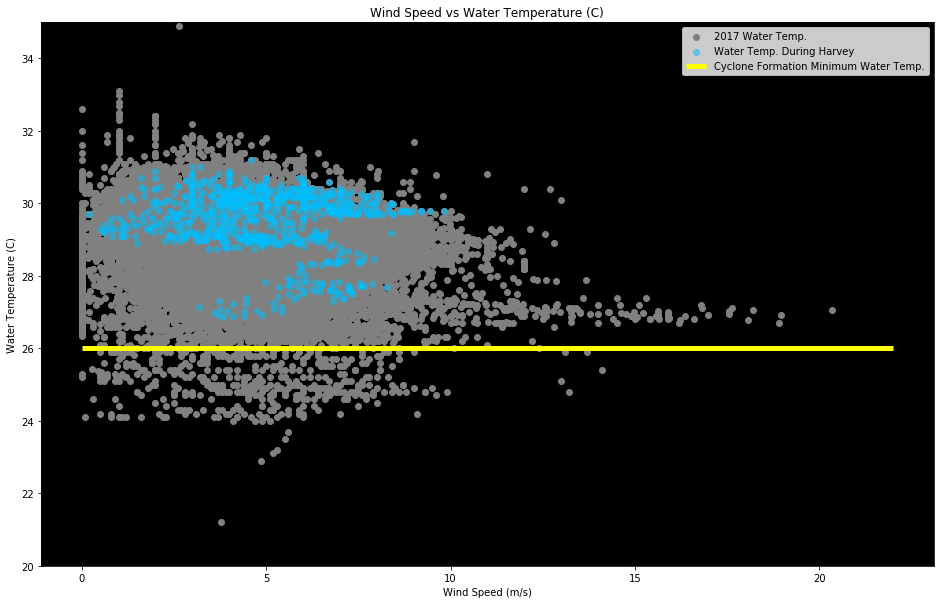

In [44]:
plt.figure(figsize=(16,10))
date_filter = (metadata_df['date']>'2017-08-10') & (metadata_df['date']<'2017-08-15')
date_filter_not = (metadata_df['date']<'2017-08-15') | (metadata_df['date']>'2017-09-01')
# plt.scatter(metadata_df_drpna["wind_speed"], metadata_df_drpna["air_pressure(mBar)"])

plt.scatter(metadata_df[date_filter_not]['wind_speed'],
            metadata_df[date_filter_not]["sea_water_temperature"],
            c='gray',
            label = "2017 Water Temp.")

plt.scatter(metadata_df[date_filter]['wind_speed'],
            metadata_df[date_filter]["sea_water_temperature"],
            c='deepskyblue', 
            alpha=0.5,
            label = "Water Temp. During Harvey")

# plt.plot(wnd_spd_vs_wtr_temp_df['wind'],
#          wnd_spd_vs_wtr_temp_df["water_temp"],       
#          linewidth = 5,
#          c = 'yellow')

plt.hlines(26, 0, 22, 
           linewidth = 5,
           color = "yellow",
           label = "Cyclone Formation Minimum Water Temp.") 

# wnd_spd_vs_wtr_temp_df.set_axis_bgcolor["black"]

plt.legend()

ax = plt.gca()
ax.set_facecolor('xkcd:black')

plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Water Temperature (C)")
plt.ylim(20, 35)

plt.title("Wind Speed vs Water Temperature (C)")

# 

# Graphs Air Pressure

In [53]:
plt.figure(figsize = (35, 10))
plt.plot_date(sens1["date"], sens1["air_pressure(mBar)"], linestyle='solid', marker='None')


plt.title(f"wmo_42019_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2520x720 with 0 Axes>

In [54]:
plt.figure(figsize = (35, 10))
plt.plot_date(sens2["date"], sens2["air_pressure(mBar)"])

plt.title(f"wmo_42043_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2520x720 with 0 Axes>

In [55]:
plt.figure(figsize = (30, 10))
plt.plot_date(sens3["date"], sens3["air_pressure(mBar)"])

plt.title(f"wmo_42044_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2160x720 with 0 Axes>

In [56]:
plt.figure(figsize = (30, 10))
plt.plot_date(sens4["date"], sens4["air_pressure(mBar)"])

plt.title(f"wmo_42047_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2160x720 with 0 Axes>

In [57]:
plt.figure(figsize = (30, 10))
plt.plot_date(sens5["date"], sens5["air_pressure(mBar)"])

plt.title(f"NOAA_NOS_CO_OPS_8764314_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2160x720 with 0 Axes>

In [58]:
plt.figure(figsize = (30, 10))
plt.plot_date(sens6["date"], sens6["air_pressure(mBar)"])

plt.title(f"NOAA_NOS_CO_OPS_8770613_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2160x720 with 0 Axes>

In [59]:
plt.figure(figsize = (30, 10))
plt.plot_date(sens7["date"], sens7["air_pressure(mBar)"])

plt.title(f"TABS_X_1 Air Pressure for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Pressure (mBar)")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2160x720 with 0 Axes>

# Graph Air Temperature

In [60]:
plt.figure(figsize = (30, 10))
# plt.plot_date(sens1["date"], sens1["air_temperature"])
# plt.plot_date(sens1["date"], sens1["air_temperature"], linestyle='solid')
plt.plot_date(sens1["date"], sens1["air_temperature"], linestyle='solid', marker='None')

plt.title(f"TABS_X_1 Air Temperature for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Temperature")
plt.xticks( rotation = 25, ha = "right")

TypeError: list indices must be integers or slices, not str

<Figure size 2160x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (30, 10))
plt.plot_date(sens7["date"], sens7["air_temperature"])

plt.title(f"TABS_X_1 Air Temperature for June thru September")
plt.xlabel("Dates")
plt.ylabel("Air Temperature")
plt.xticks( rotation = 25, ha = "right")
plt.ylim(22, 32)

In [ ]:
sens4

In [ ]:
air_press = []
wnd_spd = []
wtr_temp = []
sea_wtr_temp = []
air_temp = []
sea_wtr_slnty = []

for j in sensor_list:
#     for i in range(len(metadata_df)):
# #         if metadata_df["sensor"] == sensor_list[j]:
# #             sensor_list[j] = metadata_df["sensor"]
# #             sensor_list_2.append(metadata_df.iloc[i,:])
# #             air_press.append(sensor_df["sensor"])
# #     print(sensor_list[j])
            
            
# # sensor_list_2.append(metadata_df.iloc[i,:])
# # sensor = pd.DataFrame(sensor_list_2)
# # sensor

In [ ]:
# gpby_snsr_metadata_df.head(1)

In [ ]:
for sensor in sensor_list:
    print(sensor)

In [ ]:
df_42043_1 = []
df_42044_1 = []
df_42047_1 = []
df_8764314_1_df = []
df_8770613_1 = []
TABS_X_1 = []

for sensor in sensor_list:
    sensor = metadata_df.sensor == sensor
    print(sensor)
    test_df = metadata_df[sensor]

In [ ]:
TABS_X_1

In [ ]:
df_42043_1 = []
df_42044_1 = []
df_42047_1 = []
df_8764314_1 = []
df_8770613_1 = []
TABS_X_1 = []

for sensor in sensor_list:
    print(sensor)
    sensor = metadata_df[metadata_df.sensor == sensor]
    print(sensor_df)

In [ ]:
df_8770613_1

In [ ]:
sensor_list_2 = []

for i in range(len(metadata_df)):
    if metadata_df["sensor"][i] == "df_42043_1":
        sensor_list_2.append(metadata_df.iloc[i,:])
df_42043_1 = pd.DataFrame(sensor_list_2)
df_42043_1

In [ ]:
sensor_list_2 = []

for i in range(len(metadata_df)):
    if metadata_df["sensor"][i] == "df_42043_1":
        sensor_list_2.append(metadata_df.iloc[i,:])
df_42043_1 = pd.DataFrame(sensor_list_2)
df_42043_1

In [ ]:
sensor_list_2 = []

for i in range(len(metadata_df)):
    if metadata_df["sensor"][i] == sensor_list[i]:
        sensor_list_2.append(metadata_df.iloc[i,:])
sensor_list[i] = pd.DataFrame(sensor_list_2)
sensor_list[i]

In [ ]:
# air_press = []
# wnd_spd = []
# wtr_temp = []
# sea_wtr_temp = []
# air_temp = []
# sea_wtr_slnty = []

# for sensor in sensor_list:
#     if i in sensor = pd.DataFrame(metadata_df.loc[metadata_df["sensor"] == sensor])
#     print(f"The sensor name is: {sensor}")
#     print()
# #     print(sensor.head(2))

In [ ]:
df_42043_1.dtypes

In [ ]:
# Convert the date to a pandas 
df_42043["date"]  = pd.to_datetime(df_42043.date)

In [ ]:
df_42043_1.dtypes

In [ ]:
# datenums = md.date2num(df_42043["date"])
# type(date)
# date
# water_temp = df_42043["sea_water_temperature"]

# plt.xticks( rotation=25 )
# ax=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)

# plt.ylim(24, 31)

# metadata_df.plot(datenums, water_temp)

plt.plot_date(df_42043["date"], df_42043["air_temperature"])
plt.figure(figsize = (10, 10))


In [ ]:
# datenums = md.date2num(metadata_df["date"])
# type(date)
# date
# water_temp = metadata_df["sea_water_temperature"]

# plt.xticks( rotation=25 )
# ax=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)

# plt.ylim(25, 36.6)

# metadata_df.plot(datenums, water_temp)

plt.plot_date(df_42043["date"], df_42043["sea_water_practical_salinity"])
plt.figure(figsize = (10, 10))

In [ ]:
# datenums = md.date2num(metadata_df["date"])
# type(date)
# date
# water_temp = metadata_df["sea_water_temperature"]

# plt.xticks( rotation=25 )
# ax=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)

plt.figure(figsize = (10, 10))
# plt.ylim(25, 32)
plt.xticks(rotation=45) 
plt.plot_date(df_42043["date"], df_42043["sea_water_temperature"])

# metadata_df.plot(datenums, water_temp)

metadata_df.date.dt.dayofyear

metadata_df.date.dt.hour

metadata_df.date.dt.minute

In [ ]:
# datenums = md.date2num(metadata_df["date"])
# type(date)
# date
# water_temp = metadata_df["sea_water_temperature"]

# plt.xticks( rotation=25 )
# ax=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)

plt.figure(figsize = (10, 10))
# plt.ylim(0, 15)
plt.xticks(rotation=45) 
plt.plot_date(df_42043["date"], df_42043["wind_speed"])

# metadata_df.plot(datenums, water_temp)